Betsy Altenburger Senior STEM Concentration Project


In this project, I wanted to use Python to look at green stocks to see if the sitting president's political views impacted the stock value.

I used the data I downloaded onto my computer using Python and the Yahoo Finance API. My first instinct was to plot all the data.

NEE


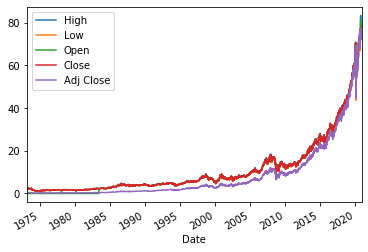

ECL


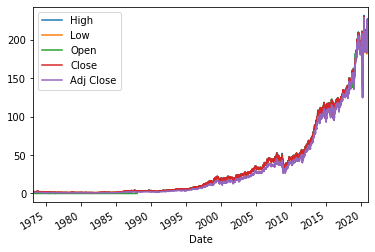

XEL


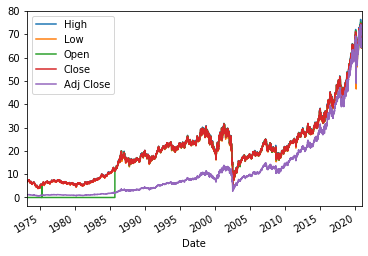

EIX


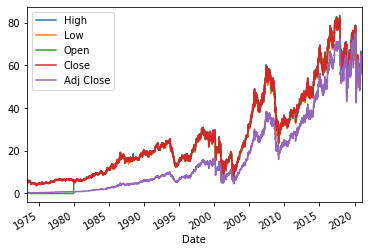

CMS


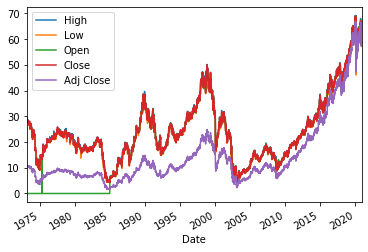

EXC


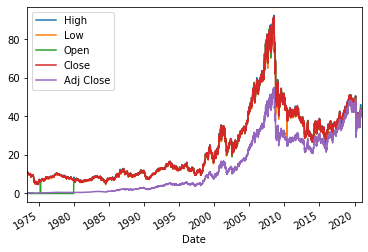

ALB


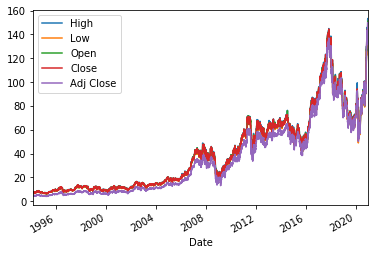

RSG


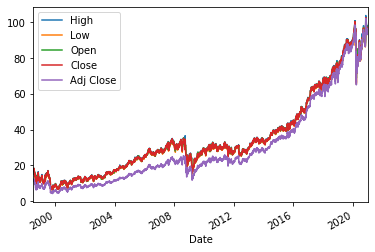

AMRC


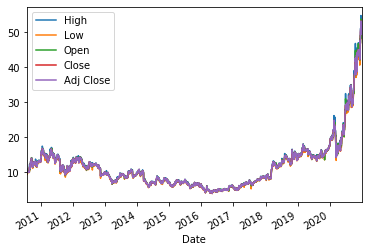

ENPH


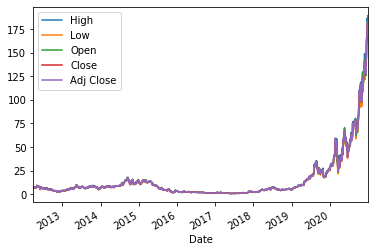

TSLA


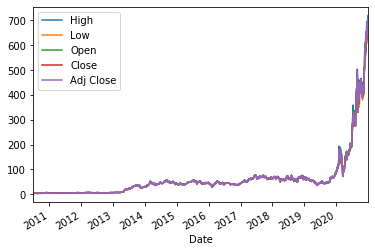

GSPC


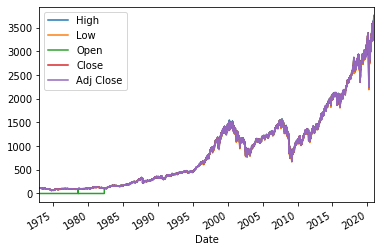

In [10]:
#plots the graph for all the companies and the S&P 500
import pandas as pd #pandas is  python library for data analysis 
from matplotlib import pyplot as plt #matplotlib is a python library for graphing

#all the companies plus the S&P 500 and GSPC or ^GSPC
tickers = ['NEE','ECL', 'XEL', 'EIX', 'CMS', 'EXC', 'ALB', 'RSG', 'AMRC', 'ENPH', 'TSLA', 'GSPC']

#loop takes in the list 'tickers' and runs through every element
for i in tickers:
    print(i) #printers ticker
    
    filename = i + '.csv' 
    #uses pandas to import the csv file as a pandas dataframe called df
    df = pd.read_csv(filename, parse_dates = True, index_col = 0) 
    #removes the volume colum because it is so high all the other values would be a straight line
    df = df.drop(columns = 'Volume')
    
    #uses matplotlib to plot the dataframe then shows it
    df.plot()
    plt.show()



After graphing, Ms. Varney suggested I perform t-tests with the data. To do this, I needed to make a data set that is the mean of all the data sets of green stock data I have.

In [11]:
#averages all the green stock companies into one data frame
import pandas as pd

# same list as before except 
ticker = ['NEE','ECL', 'XEL', 'EIX', 'CMS', 'EXC', 'ALB', 'RSG', 'AMRC', 'ENPH', 'TSLA',]

#makes a dataframe out of the first element so it can be compared to the other dataframes
df = pd.read_csv('NEE.csv', parse_dates = True, index_col = 0)

for i in ticker:
    filename = i + '.csv'
    
    #imports the next dataframe into a new dataframe
    current_df = pd.read_csv(filename, parse_dates = True, index_col = 0)
    #uses pandas to take the mean of the current dataframe and the main dataframe
    df = pd.concat([df,current_df]).groupby(level=0).mean()
    
#prints the first and last 5 values in the dataframe     
print(df.head())
print()
print(df.tail())

                 High        Low      Open      Close   Volume  Adj Close
Date                                                                     
1973-02-21  17.112305  16.844727  0.312500  17.033203  28900.0   6.049514
1973-02-22  17.108398  16.962891  0.312500  16.974609  17450.0   6.026643
1973-02-23  17.045898  16.649414  0.309570  16.780273  39500.0   5.953616
1973-02-26  16.859375  16.694336  0.310547  16.694336  82350.0   5.926570
1973-02-27  16.836914  16.753906  0.308594  16.757812  88400.0   5.949495

                  High         Low        Open       Close        Volume  \
Date                                                                       
2020-12-24  398.097219  383.268495  385.243109  394.820791  1.180036e+07   
2020-12-28  407.248138  392.520960  403.156234  394.642727  1.701852e+07   
2020-12-29  398.042531  386.928966  393.282872  394.215073  1.243634e+07   
2020-12-30  411.773475  395.756260  397.654002  409.521194  2.224213e+07   
2020-12-31  424.477125  4

With this data set, I performed a t-test between the data set of averaged data and the S&P 500. After that test, I did the same thing with each of the companies individually to see if I would get different results.

Null hypothesis: The means of the green stock companies and the S&P 500 are the same

Alternate hypothesis: The means of the green stock companies and the S&P 500 are not the same

In [12]:
#t-test between the average of all the green companies and the S&P 500
import pandas as pd
import numpy as np
from scipy import stats #scipy is a python library for math and statistics 

# the same code from the previous cell
ticker = ['NEE','ECL', 'XEL', 'EIX', 'CMS', 'EXC', 'ALB', 'RSG', 'AMRC', 'ENPH', 'TSLA',]
green_stock = pd.read_csv('NEE.csv', parse_dates = True, index_col = 0)

for i in ticker:
    filename = i + '.csv'
    current_df = pd.read_csv(filename, parse_dates = True, index_col = 0)
    green_stock = pd.concat([green_stock,current_df]).groupby(level=0).mean()

#imports the S&P 500 as a csv called stock_market   
stock_market = pd.read_csv('GSPC.csv', parse_dates = True, index_col = 0)

#collects the size of both cells then sets the int change 
length_green = np.shape(green_stock)
length_stock = np.shape(stock_market)  
    
change = length_stock[0] - length_green[0]

#drops the rows from the S&P dataframe so the two are the same size
stock_market = stock_market.drop(stock_market.index[range(0, change)])


stock_market = stock_market.drop(columns = ['High', 'Low', 'Close', 'Volume','Open'])
green_stock = green_stock.drop(columns = ['High', 'Low', 'Close', 'Volume', 'Open'])
 
#using scipy to preform a t-test and outputs results
t,p = stats.ttest_ind(stock_market, green_stock,nan_policy = 'omit')
degree_freedom = np.shape(green_stock)[0]-1
critical_t = stats.t.ppf(.95, degree_freedom) # uses confidence level of 95%
p = float(p[0])
t = float(t[0])
print('t-value: ', t)
print('critical t value: ', critical_t)
print('p-value: ', p)

if t > critical_t:
    print('reject null hypothesis')



t-value:  120.06785355865942
critical t value:  1.6449798496623937
p-value:  0.0
reject null hypothesis


In [13]:
#all the same code as the last cell but this time there is a t-test for every company
import pandas as pd
import numpy as np
from scipy import stats

tickers = ['NEE','ECL', 'XEL', 'EIX', 'CMS', 'EXC', 'ALB', 'RSG', 'AMRC', 'ENPH', 'TSLA',]
stock_market = pd.read_csv('GSPC.csv', parse_dates = True, index_col = 0)
stock_market = stock_market.drop(columns = ['High', 'Low', 'Close', 'Volume','Open'])

for i in tickers:
    print(i)
    filename = i + '.csv'
    green_stock = pd.read_csv(filename, parse_dates = True, index_col = 0)
    green_stock = green_stock.drop(columns = ['High', 'Low', 'Close', 'Volume', 'Open'])
    
    t,p = stats.ttest_ind(stock_market, green_stock,nan_policy = 'omit')
    degree_freedom = np.shape(green_stock)[0]-1
    critical_t = stats.t.ppf(.95, degree_freedom)
    
    p = float(p[0])
    t = float(t[0])
    print('t-value: ', t)
    print('critical t value: ', critical_t)
    print('p-value: ', p)

    if t > critical_t:
        print('reject null hypothesis')
    print()

NEE
t-value:  120.7485975905578
critical t value:  1.6449798496623937
p-value:  0.0
reject null hypothesis

ECL
t-value:  117.38921075409556
critical t value:  1.6449798496623937
p-value:  0.0
reject null hypothesis

XEL
t-value:  120.24970713669697
critical t value:  1.6449798496623937
p-value:  0.0
reject null hypothesis

EIX
t-value:  119.2531808908588
critical t value:  1.6449803746249494
p-value:  0.0
reject null hypothesis

CMS
t-value:  119.91475528837647
critical t value:  1.6449798496623937
p-value:  0.0
reject null hypothesis

EXC
t-value:  119.76953304787136
critical t value:  1.6449803640829088
p-value:  0.0
reject null hypothesis

ALB
t-value:  87.70518485531046
critical t value:  1.6450789676530948
p-value:  0.0
reject null hypothesis

RSG
t-value:  80.78376366297525
critical t value:  1.6451227457868172
p-value:  0.0
reject null hypothesis

AMRC
t-value:  56.163704501039845
critical t value:  1.6454332122331634
p-value:  0.0
reject null hypothesis

ENPH
t-value:  51.2524

These results were what I expected, and I could continue with my project. To cross-reference with other sectors of the S&P 500, I downloaded data for the IT, finance, and health care sector. The code is almost identical to the code in previous cells, except for the companies.

Null hypothesis: The means of the financial stock companies and the S&P 500 are the same


Alternate hypothesis: The means of the financial stock companies and the S&P 500 are not the same

In [14]:
#t-test for the financial sector 
import pandas as pd
import numpy as np
from scipy import stats

#the main difference here is the data is from 11 financial companies
ticker = ['BNC','BAC', 'COF', 'JPM', 'MET', 'WFC', 'SCHW', 'AFL', 'MTB', 'GS', 'GL',]
financial_stock = pd.read_csv('BNC.csv', parse_dates = True, index_col = 0)

#takes the mean of all 11 dataframes 
for i in ticker:
    filename = i + '.csv'
    current_df = pd.read_csv(filename, parse_dates = True, index_col = 0)
    financial_stock = pd.concat([financial_stock,current_df]).groupby(level=0).mean()

stock_market = pd.read_csv('GSPC.csv', parse_dates = True, index_col = 0)
    
length_financial = np.shape(financial_stock)
length_stock = np.shape(stock_market)
    
change = length_stock[0] - length_financial[0]

stock_market = stock_market.drop(stock_market.index[range(0, change)])
stock_market = stock_market.drop(columns = ['High', 'Low', 'Close', 'Volume','Open',])

financial_stock = financial_stock.drop(columns = ['High', 'Low', 'Close', 'Volume', 'Open',])
    
t,p = stats.ttest_ind(stock_market, green_stock,nan_policy = 'omit')
degree_freedom = np.shape(green_stock)[0]-1
critical_t = stats.t.ppf(.95, degree_freedom)
p = float(p[0])
t = float(t[0])
print('t-value: ', t)
print('critical t value: ', critical_t)
print('p-value: ', p)

if t > critical_t:
    print('reject null hypothesis')

t-value:  53.188280799797184
critical t value:  1.6454297063255543
p-value:  0.0
reject null hypothesis


Null hypothesis: The means of the IT stock companies and the S&P 500 are the same


Alternate hypothesis: The means of the IT stock companies and the S&P 500 are not the same

In [15]:
#same thing as pervious cell but now the companies are all in IT
import pandas as pd
import numpy as np
from scipy import stats

ticker = ['MSFT','ORCL', 'MA', 'AAPL', 'PYPL', 'MU', 'CSCO', 'ADBE', 'HPE', 'TXN', 'INTC',]
it_stock = pd.read_csv('MSFT.csv', parse_dates = True, index_col = 0)

for i in ticker:
    filename = i + '.csv'
    current_df = pd.read_csv(filename, parse_dates = True, index_col = 0)
    it_stock = pd.concat([it_stock,current_df]).groupby(level=0).mean()

stock_market = pd.read_csv('GSPC.csv', parse_dates = True, index_col = 0)
    
length_it = np.shape(it_stock)
length_stock = np.shape(stock_market)
    
change = length_stock[0] - length_it[0]

stock_market = stock_market.drop(stock_market.index[range(0, change)])
stock_market = stock_market.drop(columns = ['High', 'Low', 'Close', 'Volume','Open',])


it_stock = it_stock.drop(columns = ['High', 'Low', 'Close', 'Volume', 'Open',])
    
t,p = stats.ttest_ind(stock_market, green_stock,nan_policy = 'omit')
degree_freedom = np.shape(green_stock)[0]-1
critical_t = stats.t.ppf(.95, degree_freedom)
p = float(p[0])
t = float(t[0])
print('t-value: ', t)
print('critical t value: ', critical_t)
print('p-value: ', p)

if t > critical_t:
    print('reject null hypothesis')

t-value:  53.188280799797184
critical t value:  1.6454297063255543
p-value:  0.0
reject null hypothesis


Null hypothesis: The means of the health care stock companies and the S&P 500 are the same


Alternate hypothesis: The means of the health care stock companies and the S&P 500 are not the same

In [16]:
#another t-test but now with companies in the health care sector
import pandas as pd
import numpy as np
from scipy import stats

ticker = ['CVS','JNJ', 'SYK', 'IDXX', 'ABT', 'CI', 'BSX', 'DGX','PFE', 'CAH', 'HUM',]
health_stock = pd.read_csv('MSFT.csv', parse_dates = True, index_col = 0)

for i in ticker:
    filename = i + '.csv'
    health_df = pd.read_csv(filename, parse_dates = True, index_col = 0)
    health_stock = pd.concat([health_stock,current_df]).groupby(level=0).mean()

stock_market = pd.read_csv('GSPC.csv', parse_dates = True, index_col = 0)
    
length_health = np.shape(health_stock)
length_stock = np.shape(stock_market)
    
change = length_stock[0] - length_health[0]

stock_market = stock_market.drop(stock_market.index[range(0, change)])
stock_market = stock_market.drop(columns = ['High', 'Low', 'Close', 'Volume','Open',])


health_stock = health_stock.drop(columns = ['High', 'Low', 'Close', 'Volume', 'Open',])
    
t,p = stats.ttest_ind(stock_market, health_stock,nan_policy = 'omit')
critical_t = stats.t.ppf(.95, degree_freedom)
p = float(p[0])
t = float(t[0])
print('t-value: ', t)
print('critical t value: ', critical_t)
print('p-value: ', p)

if t > critical_t:
    print('reject null hypothesis')

t-value:  130.36762569164927
critical t value:  1.6454297063255543
p-value:  0.0
reject null hypothesis


After seeing those results, there was not much difference in the green stocks versus the other sectors. I then decided to filter the green stock data for each of the five most recent presidencies. With this, I performed more t-tests.

In [17]:
#t-tests comparing the green companies to the S&P 500 during the last 5 presidencies  
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

#creates a dictionary of all the presidents
trump = {'Name': 'Trump',
         'Start': '2017-1-20',
         'End': '2021-1-20'}
obama = {'Name': 'Obama',
         'Start': '2009-1-20',
         'End': '2017-1-20'}
gw_bush = {'Name': 'GW Bush',
           'Start': '2001-1-20',
           'End': '2009-1-20'}
clinton = {'Name': 'Clinton',
           'Start': '1993-1-20',
           'End': '2001-1-20'}
ghw_bush = {'Name': 'GHW Bush',
            'Start': '1989-1-20',
            'End': '1993-1-20'}
presidents = [trump, obama, gw_bush, clinton, ghw_bush]

#creates a dataframe that is the average of all the green stock companies 
ticker = ['NEE','ECL', 'XEL', 'EIX', 'CMS', 'EXC', 'ALB', 'RSG', 'AMRC', 'ENPH', 'TSLA',]
green_stock = pd.read_csv('NEE.csv', parse_dates = True, index_col = 0)
for i in ticker:
    filename = i + '.csv'
    current_df = pd.read_csv(filename, parse_dates = True, index_col = 0)
    
#loop that goes through all the presidents in the list from above
for i in presidents:
    print(i['Name'])
    
    #imports the S&P data and cuts it down to just the start and end dates for the president the itteration is on
    stock_market = pd.read_csv('GSPC.csv', parse_dates = True, index_col = 0)
    stock_market = stock_market.loc[(stock_market.index >= i['Start']) 
                     & (stock_market.index < i['End'])]

    #imports the green stock data and cuts it down to just the start and end dates for the president the itteration is on
    green_stock = pd.concat([green_stock,current_df]).groupby(level=0).mean() 
    green_stock = green_stock.loc[(green_stock.index >= i['Start']) 
                     & (green_stock.index < i['End'])]
    
    #t-test
    t,p = stats.ttest_ind(stock_market, green_stock,nan_policy = 'omit')
    degree_freedom = np.shape(green_stock)[0]-1
    critical_t = stats.t.ppf(.95, degree_freedom)
    p = float(p[0])
    t = float(t[0])
    print('t-value: ', t)
    print('critical t value: ', critical_t)
    print('p-value: ', p)

    if t > critical_t:
        print('reject null hypothesis')
    
    #reimports the dataframe so that the data is consitant
    green_stock = pd.read_csv('NEE.csv', parse_dates = True, index_col = 0)
    for i in ticker:
        filename = i + '.csv'
        current_df = pd.read_csv(filename, parse_dates = True, index_col = 0)
        
    print()


Trump
t-value:  254.00633017162448
critical t value:  1.646388032302133
p-value:  0.0
reject null hypothesis

Obama
t-value:  166.01434167128355
critical t value:  1.6456105656581783
p-value:  0.0
reject null hypothesis

GW Bush
t-value:  293.256210533775
critical t value:  1.6456128284772815
p-value:  0.0
reject null hypothesis

Clinton
t-value:  104.23806113676869
critical t value:  1.6456083162877684
p-value:  0.0
reject null hypothesis

GHW Bush
t-value:  284.8381741156998
critical t value:  1.6463637024496844
p-value:  0.0
reject null hypothesis



Trump
Green Stock


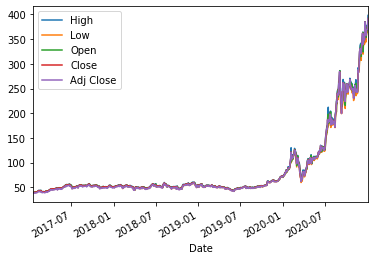

Stock Market


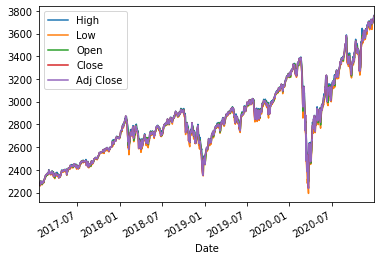

Obama
Green Stock


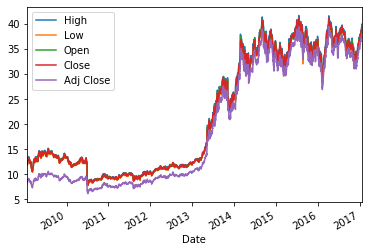

Stock Market


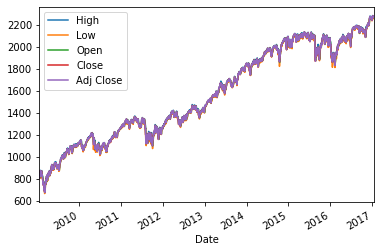

GW Bush
Green Stock


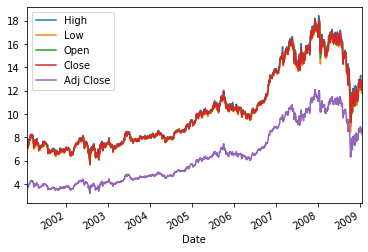

Stock Market


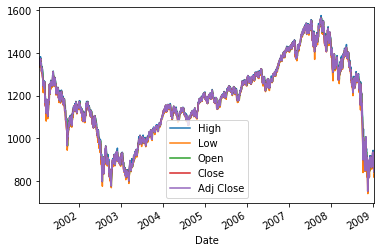

Clinton
Green Stock


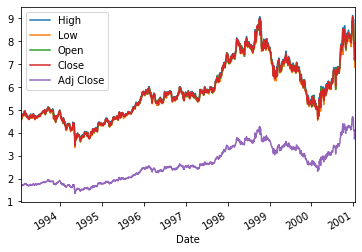

Stock Market


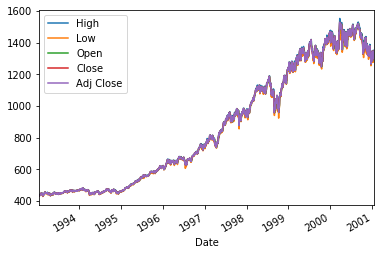

GHW Bush
Green Stock


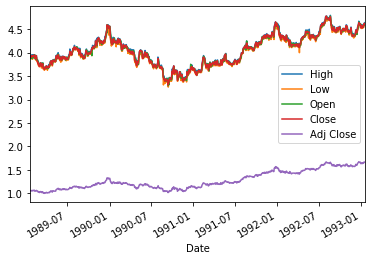

Stock Market


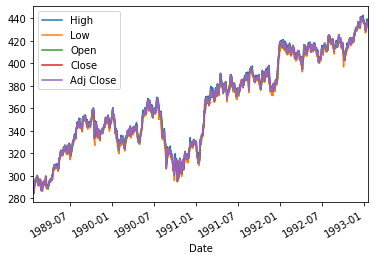

In [18]:
#graphing
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

#creates a dictionary of all the presidents
trump = {'Name': 'Trump',
         'Start': '2017-1-20',
         'End': '2021-1-20'}
obama = {'Name': 'Obama',
         'Start': '2009-1-20',
         'End': '2017-1-20'}
gw_bush = {'Name': 'GW Bush',
           'Start': '2001-1-20',
           'End': '2009-1-20'}
clinton = {'Name': 'Clinton',
           'Start': '1993-1-20',
           'End': '2001-1-20'}
ghw_bush = {'Name': 'GHW Bush',
            'Start': '1989-1-20',
            'End': '1993-1-20'}
presidents = [trump, obama, gw_bush, clinton, ghw_bush]

#creates a dataframe that is the average of all the green stock companies 
ticker = ['NEE','ECL', 'XEL', 'EIX', 'CMS', 'EXC', 'ALB', 'RSG', 'AMRC', 'ENPH', 'TSLA',]
green_stock = pd.read_csv('NEE.csv', parse_dates = True, index_col = 0)
for i in ticker:
    filename = i + '.csv'
    current_df = pd.read_csv(filename, parse_dates = True, index_col = 0)
    
#loop that goes through all the presidents in the list from above
for i in presidents:
    print(i['Name'])
    
    #imports the S&P data and cuts it down to just the start and end dates for the president the itteration is on
    stock_market = pd.read_csv('GSPC.csv', parse_dates = True, index_col = 0)
    stock_market = stock_market.loc[(stock_market.index >= i['Start']) 
                     & (stock_market.index < i['End'])]

    #imports the green stock data and cuts it down to just the start and end dates for the president the itteration is on
    green_stock = pd.concat([green_stock,current_df]).groupby(level=0).mean() 
    green_stock = green_stock.loc[(green_stock.index >= i['Start']) 
                     & (green_stock.index < i['End'])]
    #drops the Volume column in both dataframes becuase that messes up the graph scale
    green_stock = green_stock.drop(columns = 'Volume')
    stock_market = stock_market.drop(columns = 'Volume')
    
    #plots the green stock for that president
    print('Green Stock')
    green_stock.plot()
    plt.show()
    #plots the S&P for that president
    print('Stock Market')
    stock_market.plot()
    plt.show()
    
    #reimports the dataframe so that the data is consitant
    green_stock = pd.read_csv('NEE.csv', parse_dates = True, index_col = 0)
    for i in ticker:
        filename = i + '.csv'
        current_df = pd.read_csv(filename, parse_dates = True, index_col = 0)